# FIFA ATTACKING ANALYSIS + MODEL

## Data Preprocessing

In [4]:
import pandas as pd

In [5]:
players_17 = pd.read_csv("/Users/dysson/Desktop/FIFA_Flask_ML_App/data/players_17.csv")
players_18 = pd.read_csv("/Users/dysson/Desktop/FIFA_Flask_ML_App/data/players_18.csv")
players_19 = pd.read_csv("/Users/dysson/Desktop/FIFA_Flask_ML_App/data/players_19.csv")
players_20 = pd.read_csv("/Users/dysson/Desktop/FIFA_Flask_ML_App/data/players_20.csv")

In [6]:
frames = [players_17,players_18,players_19,players_20]
players = pd.concat(frames)

attack_positions = ['CF', 'ST', 'RW', 'LW', 'RF', 'LF']
attackers_filter = [any([kw in r for kw in attack_positions]) for r in players['player_positions']]
attackers = players[attackers_filter]
cols_filter = ['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']

attackers = attackers[cols_filter]

In [7]:
object_cols = attackers.select_dtypes(include='object').columns.tolist()

for col in object_cols:
    attackers[col] = attackers[col].str.split(r"\+|-", n=0, expand=True)
    attackers[col] = pd.to_numeric(attackers[col])
    attackers.dropna(inplace=True)

In [8]:
object_cols_2 = attackers.select_dtypes(include='float64').columns.tolist()

for col in object_cols_2:
   attackers[col] = attackers[col].apply(lambda x: int(x))

## Data Viz

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

In [12]:
cols = attackers.columns.tolist()
no_ovr = attackers.columns.tolist()[1:]

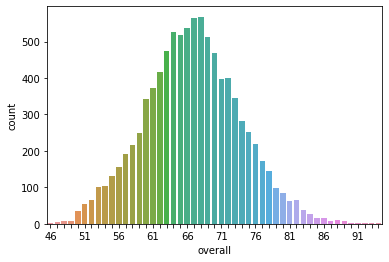

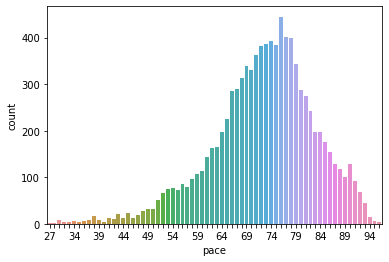

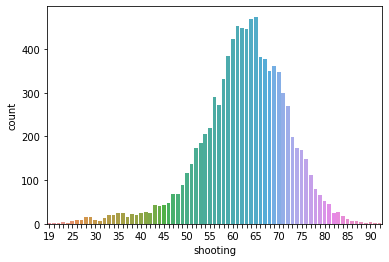

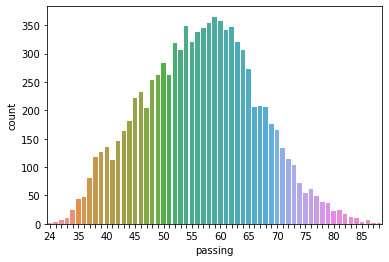

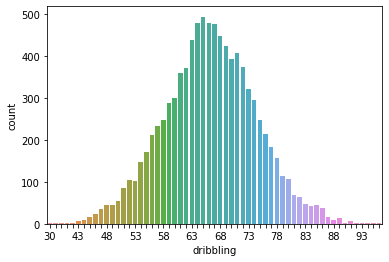

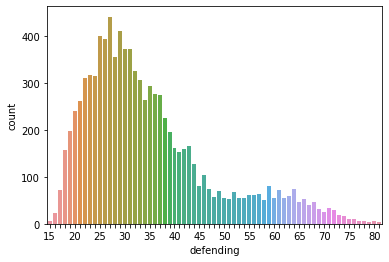

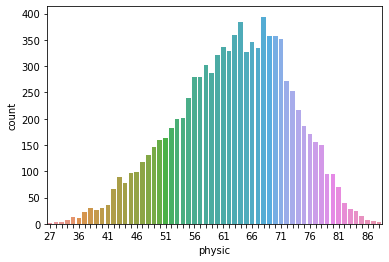

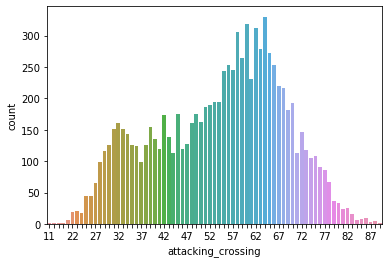

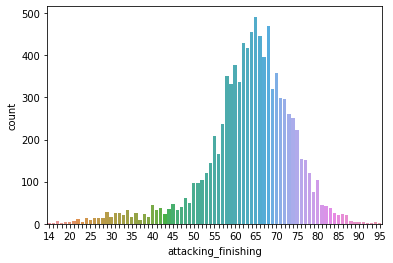

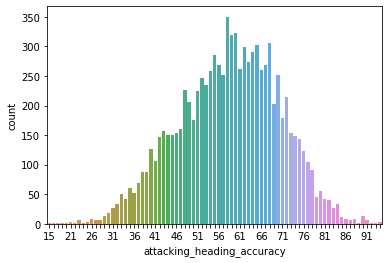

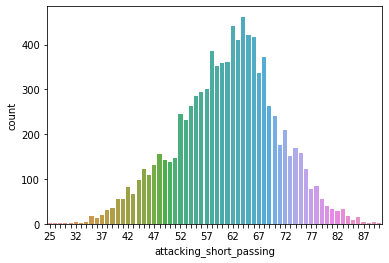

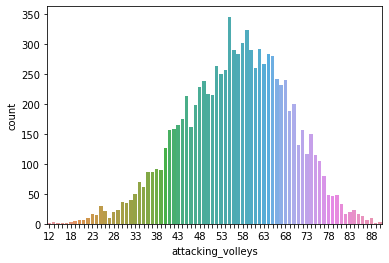

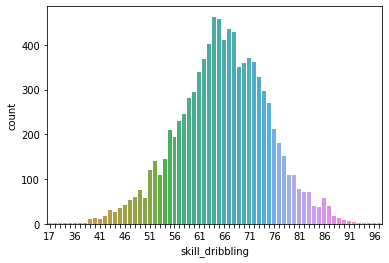

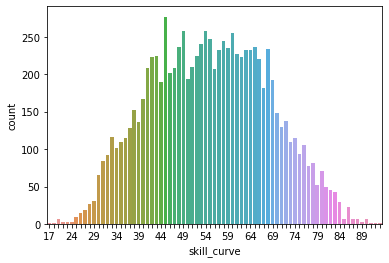

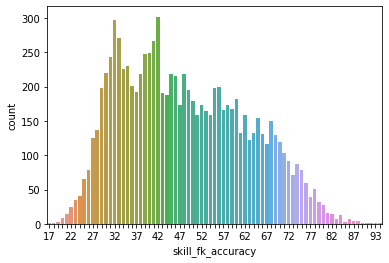

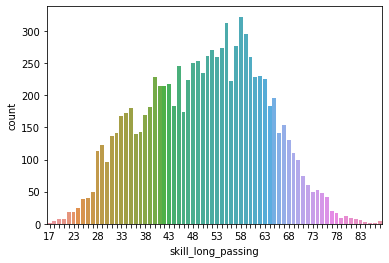

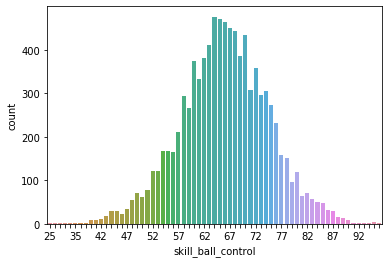

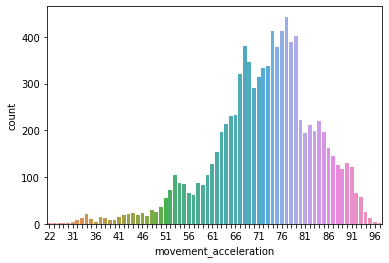

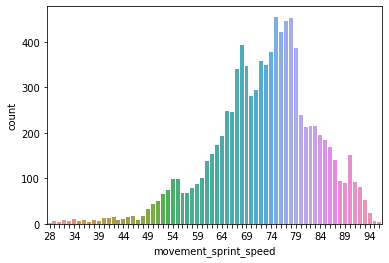

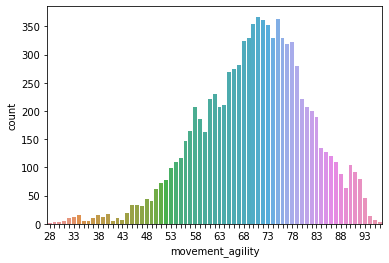

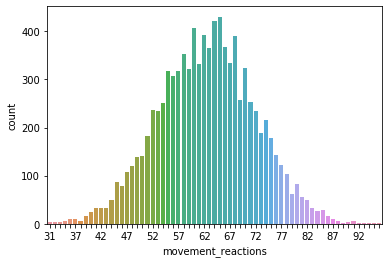

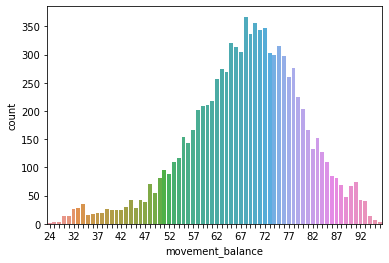

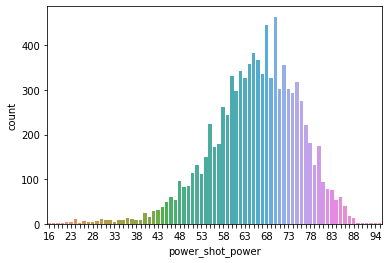

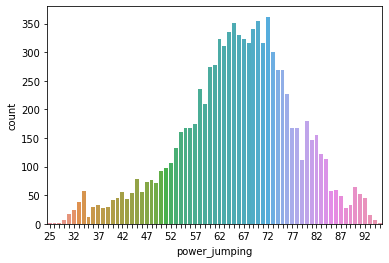

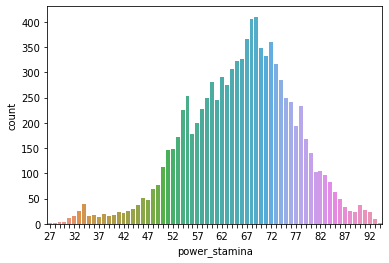

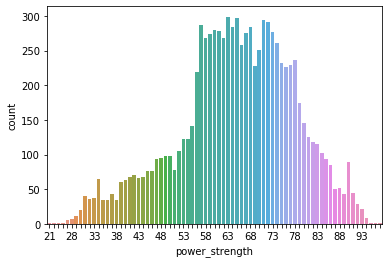

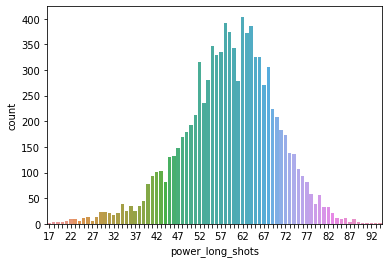

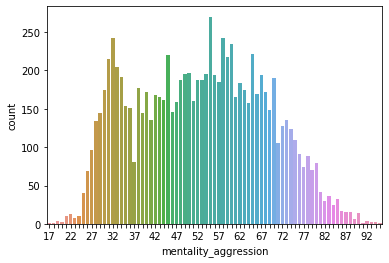

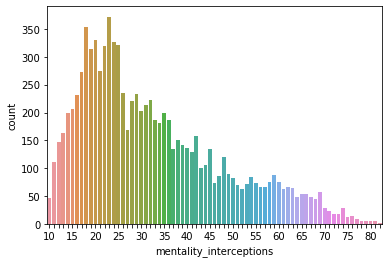

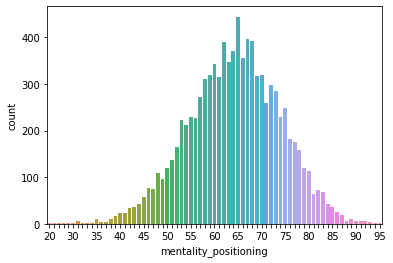

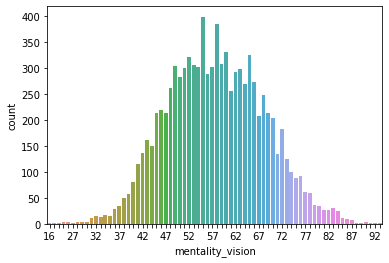

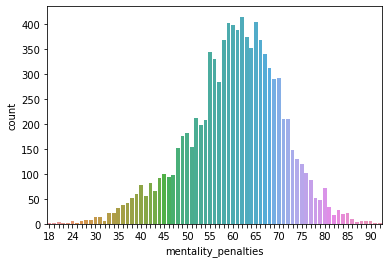

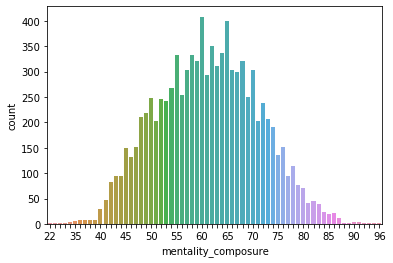

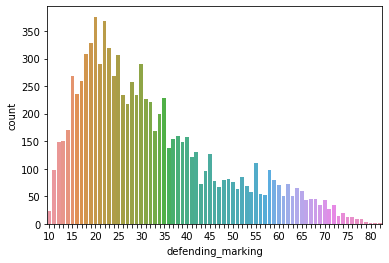

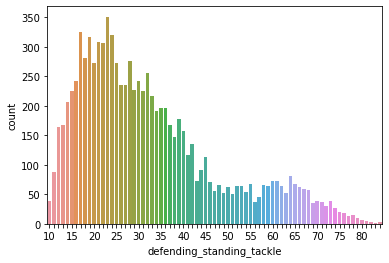

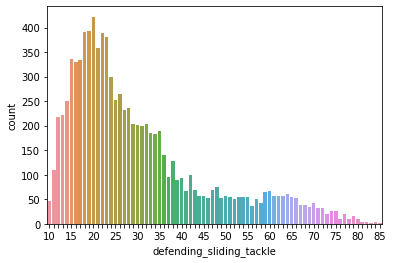

In [124]:
# Count Plots

for x in cols:
    ax = sns.countplot(x=x, data=attackers)
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i]='' # skip every 5 labels
    ax.set_xticklabels(labels, rotation=0) # set new labels
    plt.show()

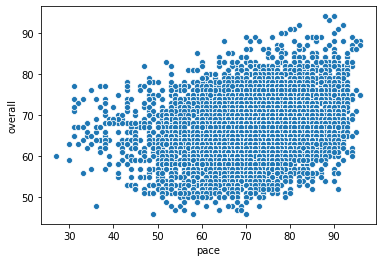

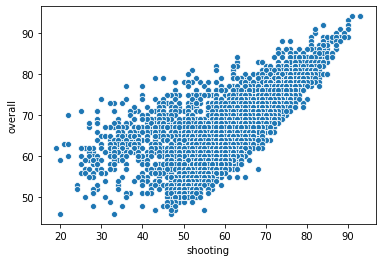

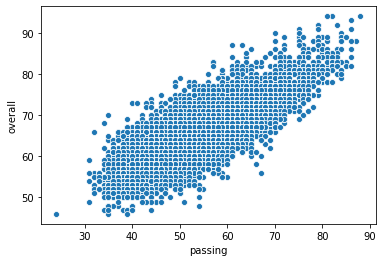

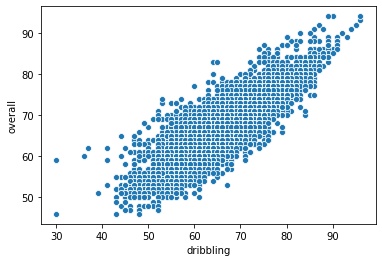

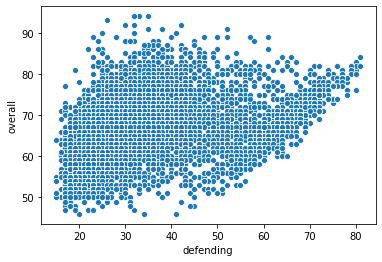

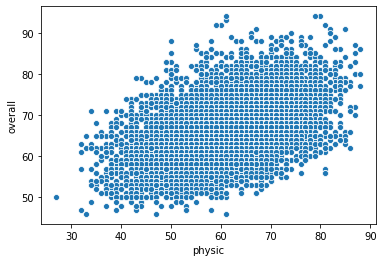

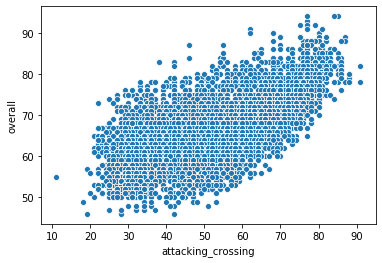

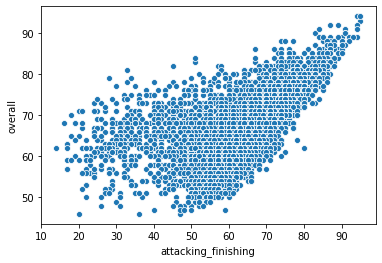

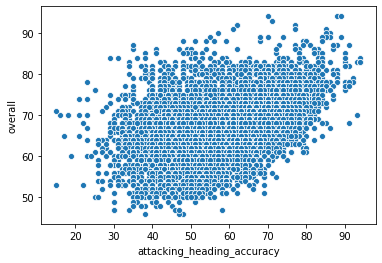

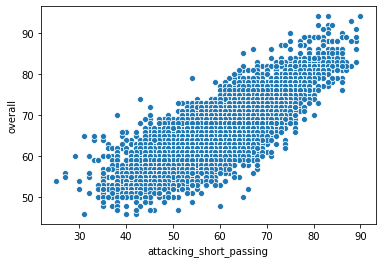

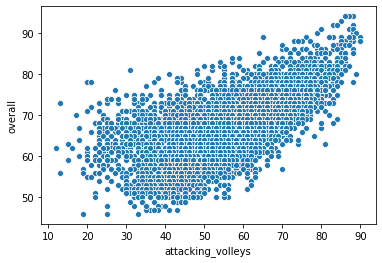

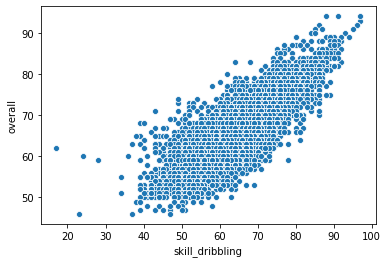

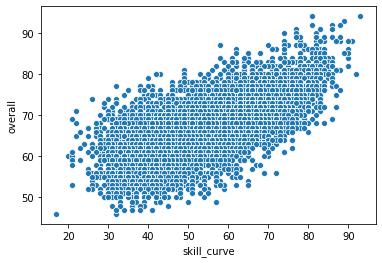

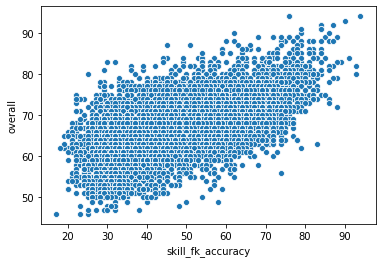

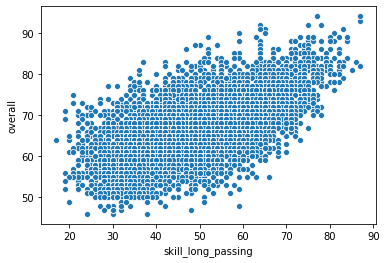

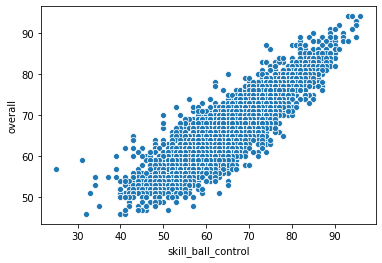

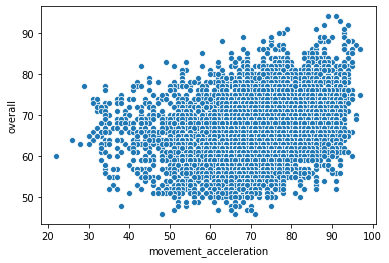

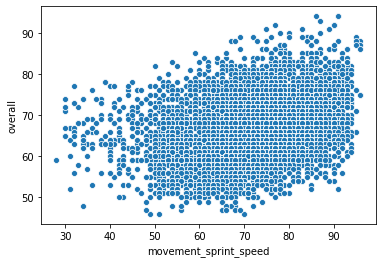

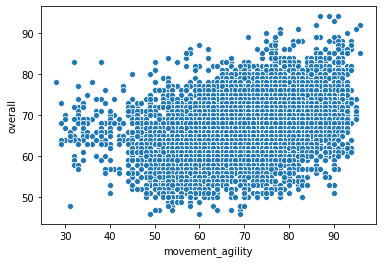

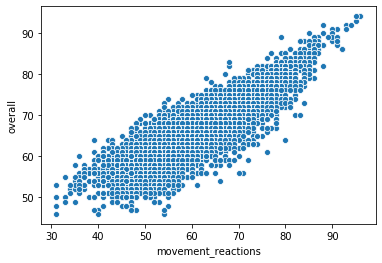

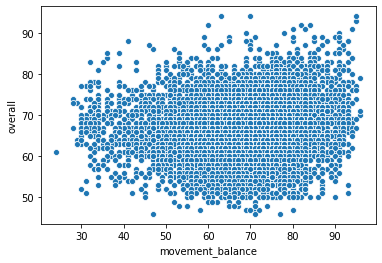

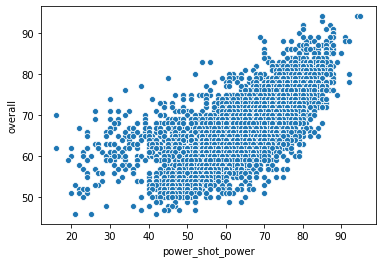

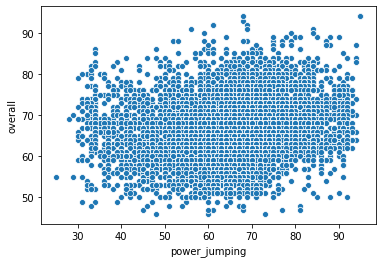

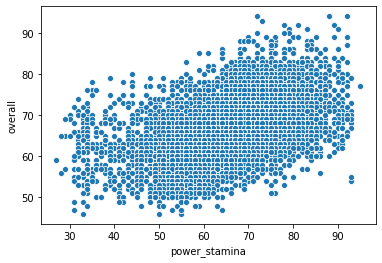

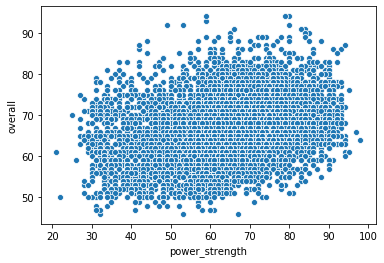

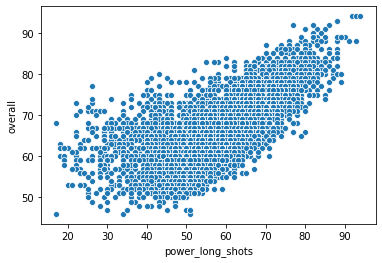

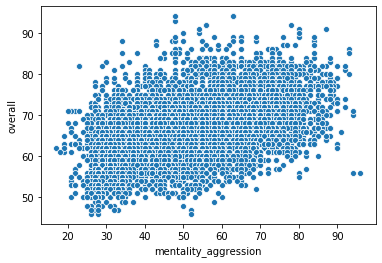

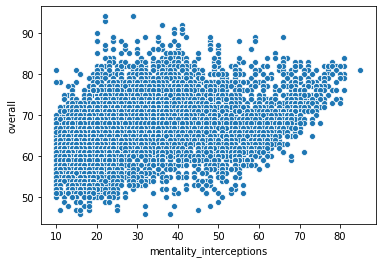

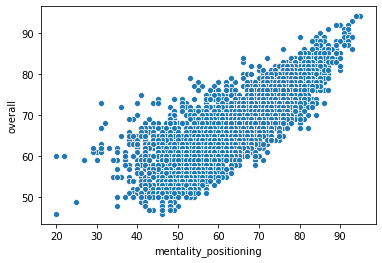

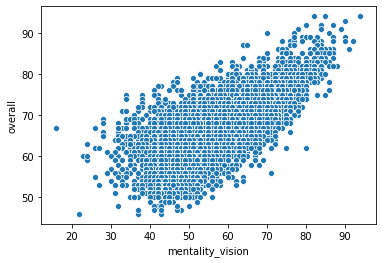

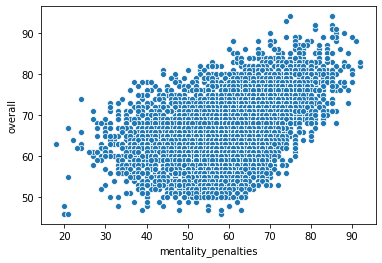

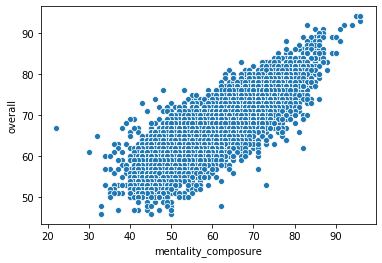

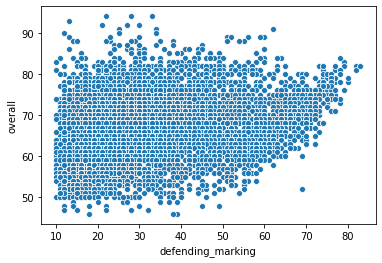

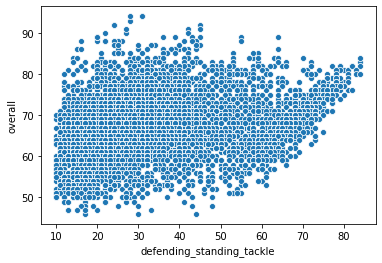

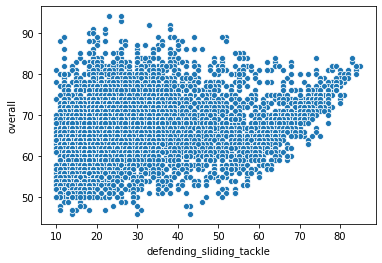

In [89]:
# Scatter Plots

for x in no_ovr:
    sns.scatterplot(x=x, y='overall', data=attackers)
    plt.show()

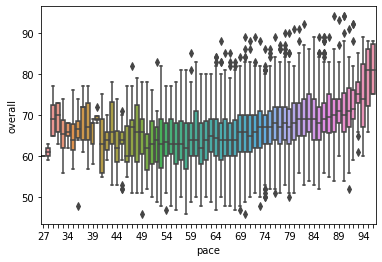

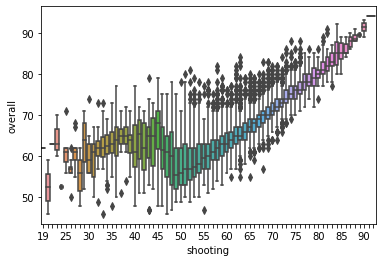

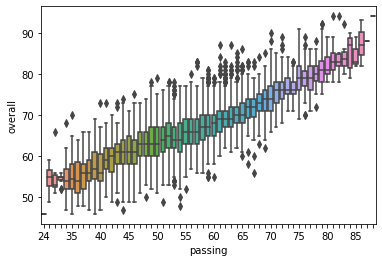

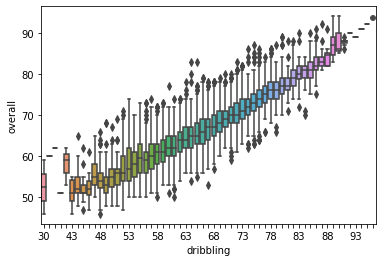

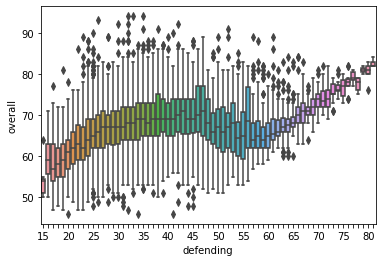

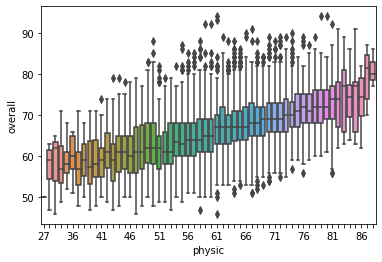

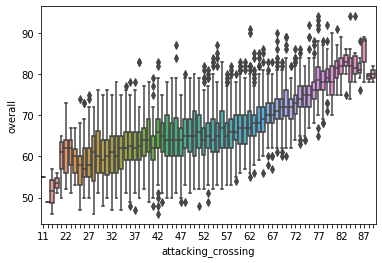

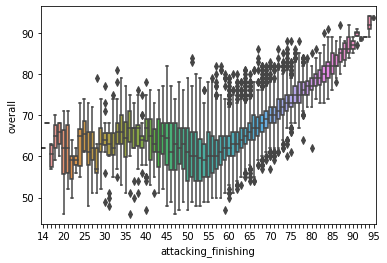

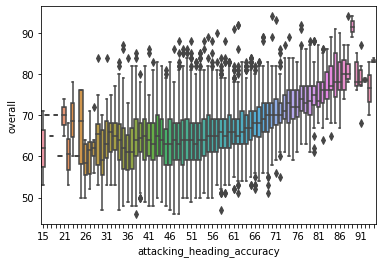

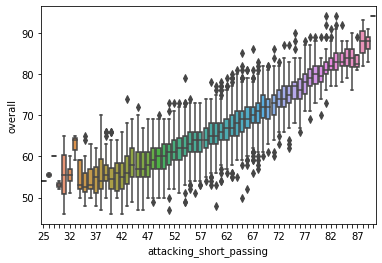

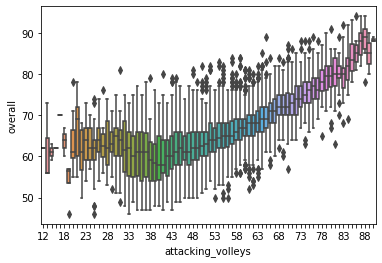

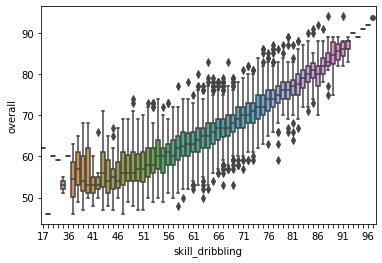

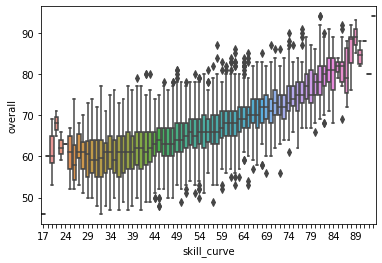

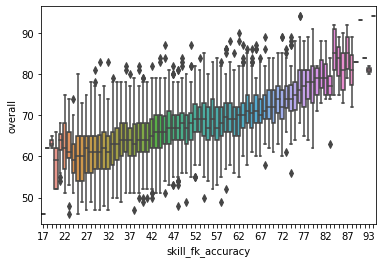

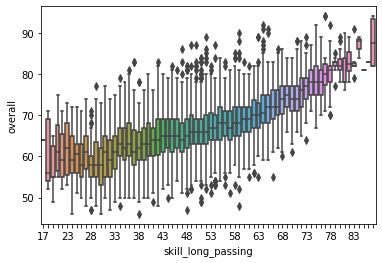

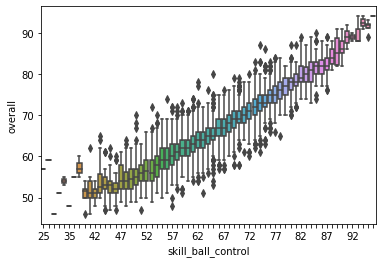

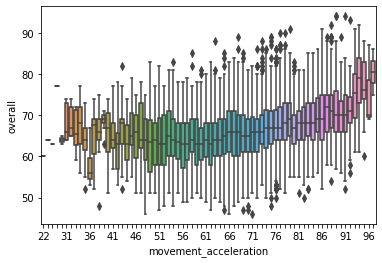

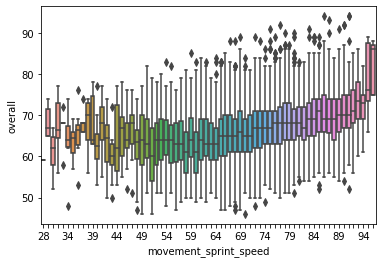

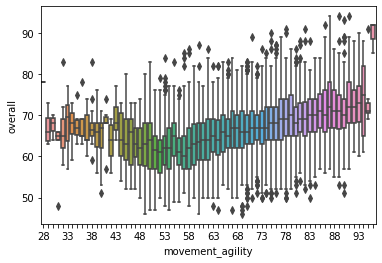

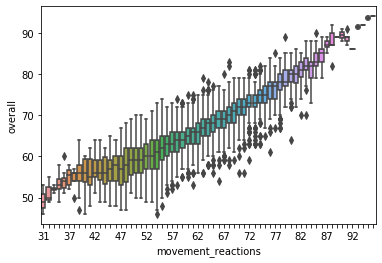

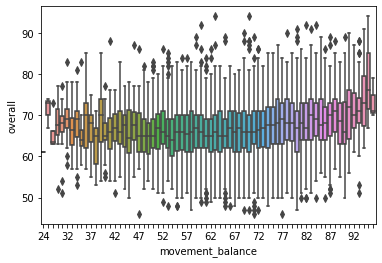

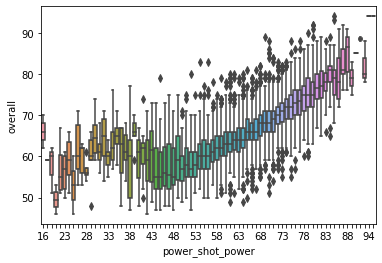

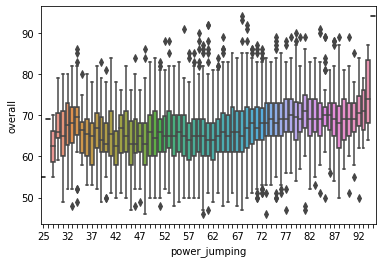

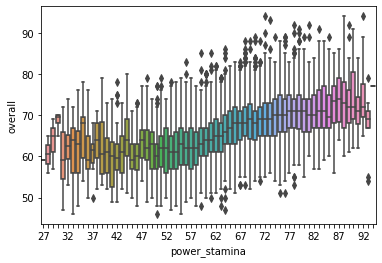

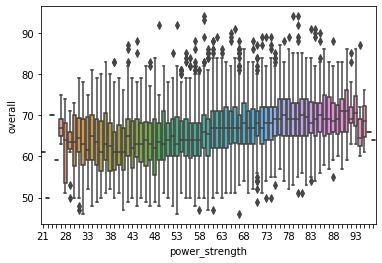

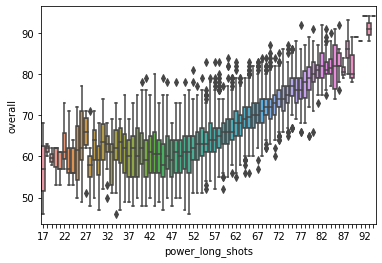

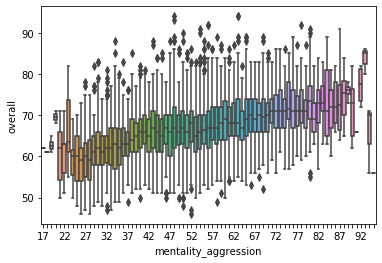

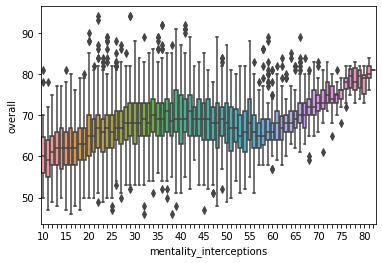

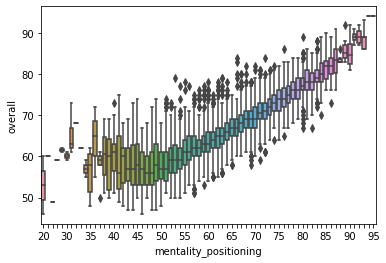

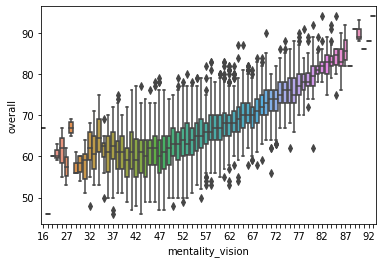

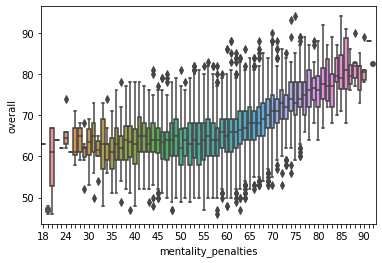

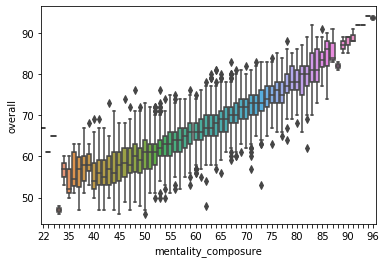

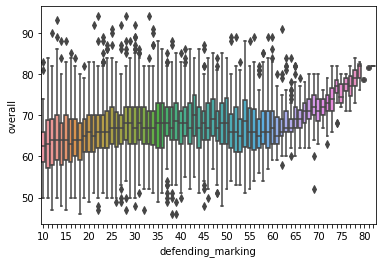

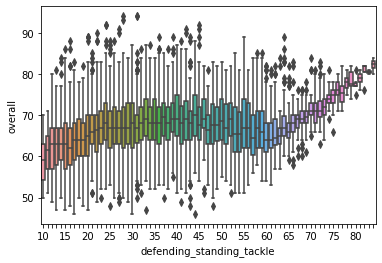

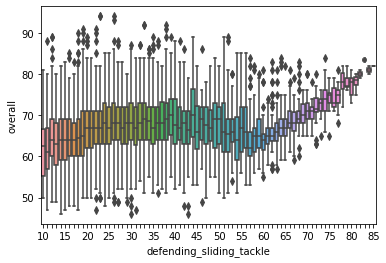

In [129]:
# Box Plots

for x in no_ovr:
    ax = sns.boxplot(data=attackers, x=x, y='overall')
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i]='' # skip every 5 labels
    ax.set_xticklabels(labels, rotation=0) # set new labels
    plt.show()

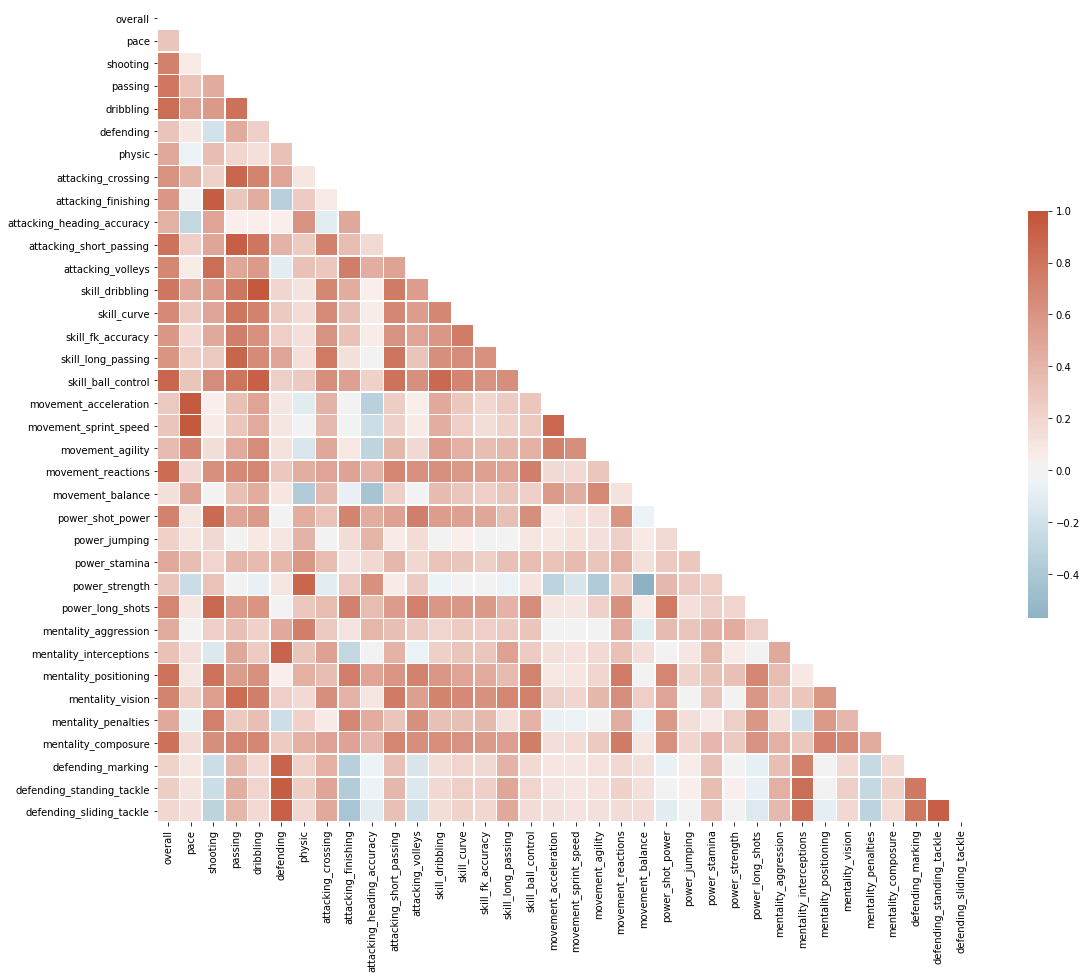

In [147]:
# Corr Plot

corr = attackers.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.subplots(figsize=(20,15))

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

## Model Building

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE


In [168]:
steps = [('scaler', StandardScaler()),
        ('lr', LinearRegression())]

pipeline = Pipeline(steps)

In [13]:
X = attackers[no_ovr]
y = attackers['overall']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [183]:
lr_scaled = pipeline.fit(X_train, y_train)

lr_unscaled = LinearRegression().fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(lr_scaled
.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(lr_unscaled.score(X_test,y_test)))

y_pred_lr_scale = lr_scaled.predict(X_test)
y_pred_lr = lr_unscaled.predict(X_test)

rmse_test_lr_scale = (MSE(y_test, y_pred_lr_scale) ** (1/2))

rmse_test_lr = (MSE(y_test, y_pred_lr) ** (1/2))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_lr_scale))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_lr))

Accuracy with Scaling: 0.9486121704109776
Accuracy without Scaling: 0.9486121704109776
Test set RMSE of rf: 1.62
Test set RMSE of rf: 1.62


### Assuming accuracy score is the same due to all variables on the same scale (0-100)

In [14]:
rf = RandomForestRegressor(n_estimators=25,
                          random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test_rf = (MSE(y_test, y_pred) ** (1/2))

print('Accuracy with RF: {}'.format(rf
.score(X_test,y_test)))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_rf))

Accuracy with RF: 0.972385765744061
Test set RMSE of rf: 1.18


### RF model is better

There are improvements we can make to model: Mainly, feature engineering

## Dump RF Model

In [1]:
from joblib import dump

In [15]:
dump(rf, filename="fifa_atk_regressor.joblib")

['fifa_atk_regressor.joblib']